<a href="https://colab.research.google.com/github/sayedmohamedscu/YOLOv8-Door-detection-for-visually-impaired-people/blob/main/tutorial_7_train_yolov8_door_detection_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

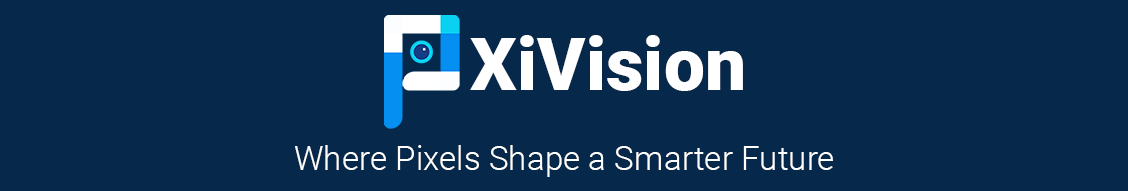

# YOLOv8 door detection for visually impaired individuals:


Imagine a world where doors become more than just obstacles for the visually impaired. Our YOLOv8 project revolutionizes accessibility by using cutting-edge computer vision technology to detect doors.

**Dataset**

Dataset has been collected from New York

**annotation**

Data first auto annotated using a cutting edge solution followed by mnanual enhancment

[**Download the dataset**
](https://drive.google.com/file/d/1-0dWfmeUXN7V1tvZQubcRW6frCEu8fjq/view?usp=sharing)

In [1]:
!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 610.8/610.8 kB 8.0 MB/s eta 0:00:00


In [2]:
import torch
from ultralytics import YOLO


In [ ]:
!unzip "/content/drive/MyDrive/doorsdataset/doors.zip" -d "final_data"

In [5]:
model = YOLO("yolov8s.pt")  # load model (from pretrained)

100%|██████████| 21.5M/21.5M [00:00<00:00, 134MB/s] 


In [9]:
# Get_im_size("/content/data.yaml")

Mean width: 790.6293706293707
Mean height: 1026.7599067599067


1280

In [11]:
# Get_num_epochs("/content/data.yaml")

47

In [13]:
#200
model.train(data='/content/data.yaml', epochs=47,imgsz=1280,batch=8)

Ultralytics YOLOv8.0.163 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/data.yaml, epochs=47, patience=50, batch=8, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynami

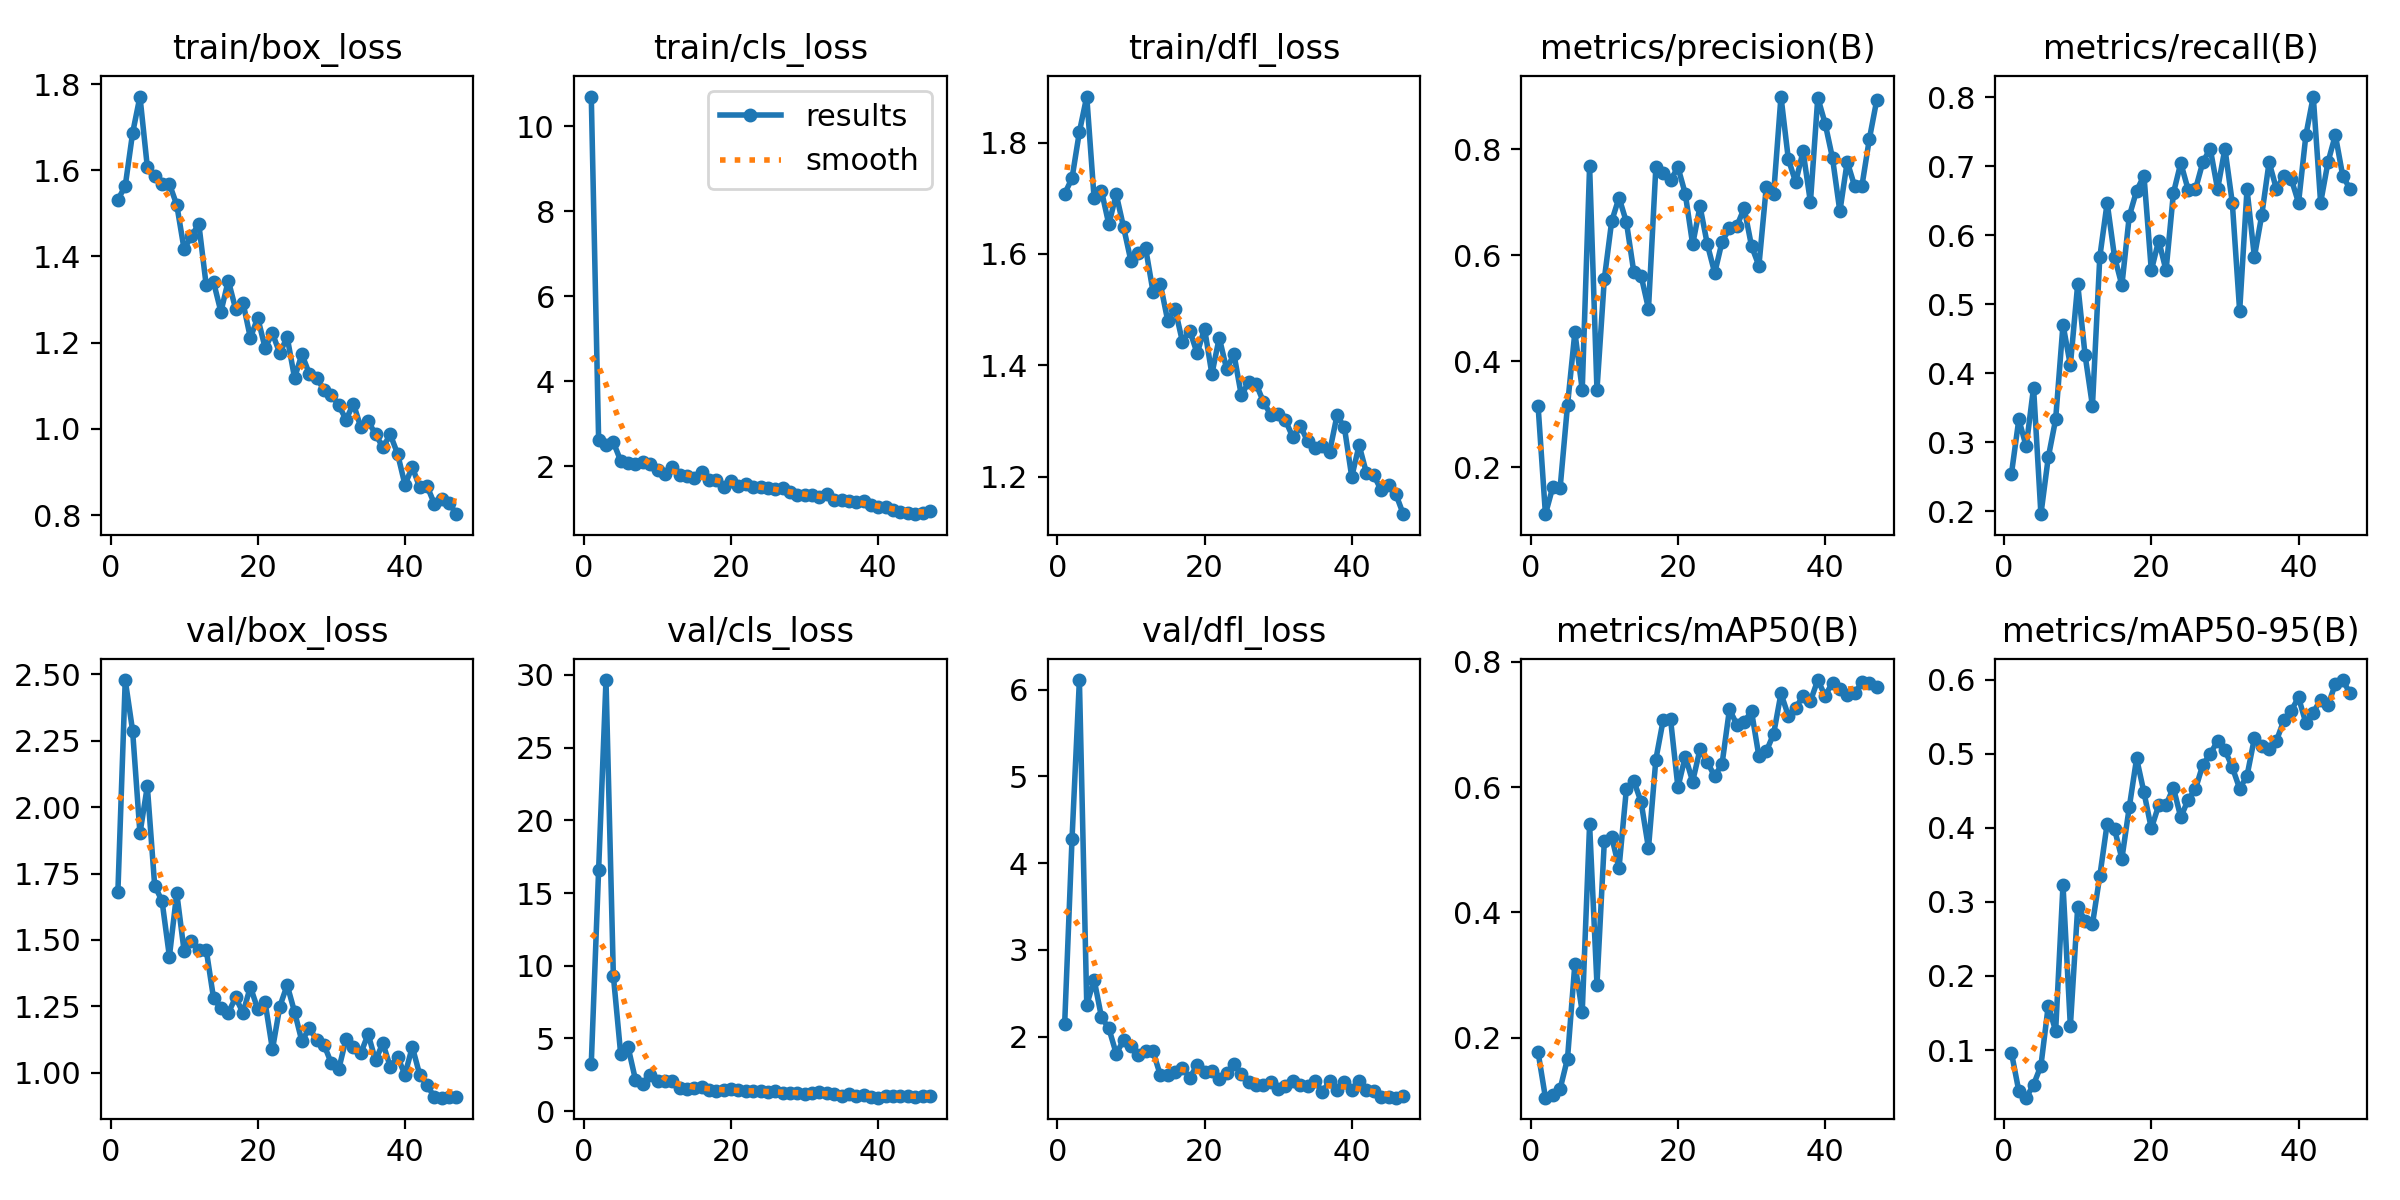

# load best model

In [28]:
model = YOLO("/content/runs/detect/train2/weights/best.pt")  # load model (from pretrained)

In [29]:
res=model.predict("/content/test.png",save=True,conf=0.3)


image 1/1 /content/test.png: 736x1280 1 door, 34.2ms
Speed: 21.4ms preprocess, 34.2ms inference, 67.0ms postprocess per image at shape (1, 3, 736, 1280)
Results saved to runs/detect/predict5


In [16]:
res=model.predict("/content/Screenshot from 2023-08-27 00-34-20.png",save=True,conf=0.3)


image 1/1 /content/Screenshot from 2023-08-27 00-34-20.png: 736x1280 2 doors, 41.8ms
Speed: 19.5ms preprocess, 41.8ms inference, 14.0ms postprocess per image at shape (1, 3, 736, 1280)
Results saved to runs/detect/predict3


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load your images
image1 = mpimg.imread('/content/test.png')
image2 = mpimg.imread('/content/runs/detect/predict2/test.png')

# Plotting the images side by side
plt.figure(figsize=(20, 20))

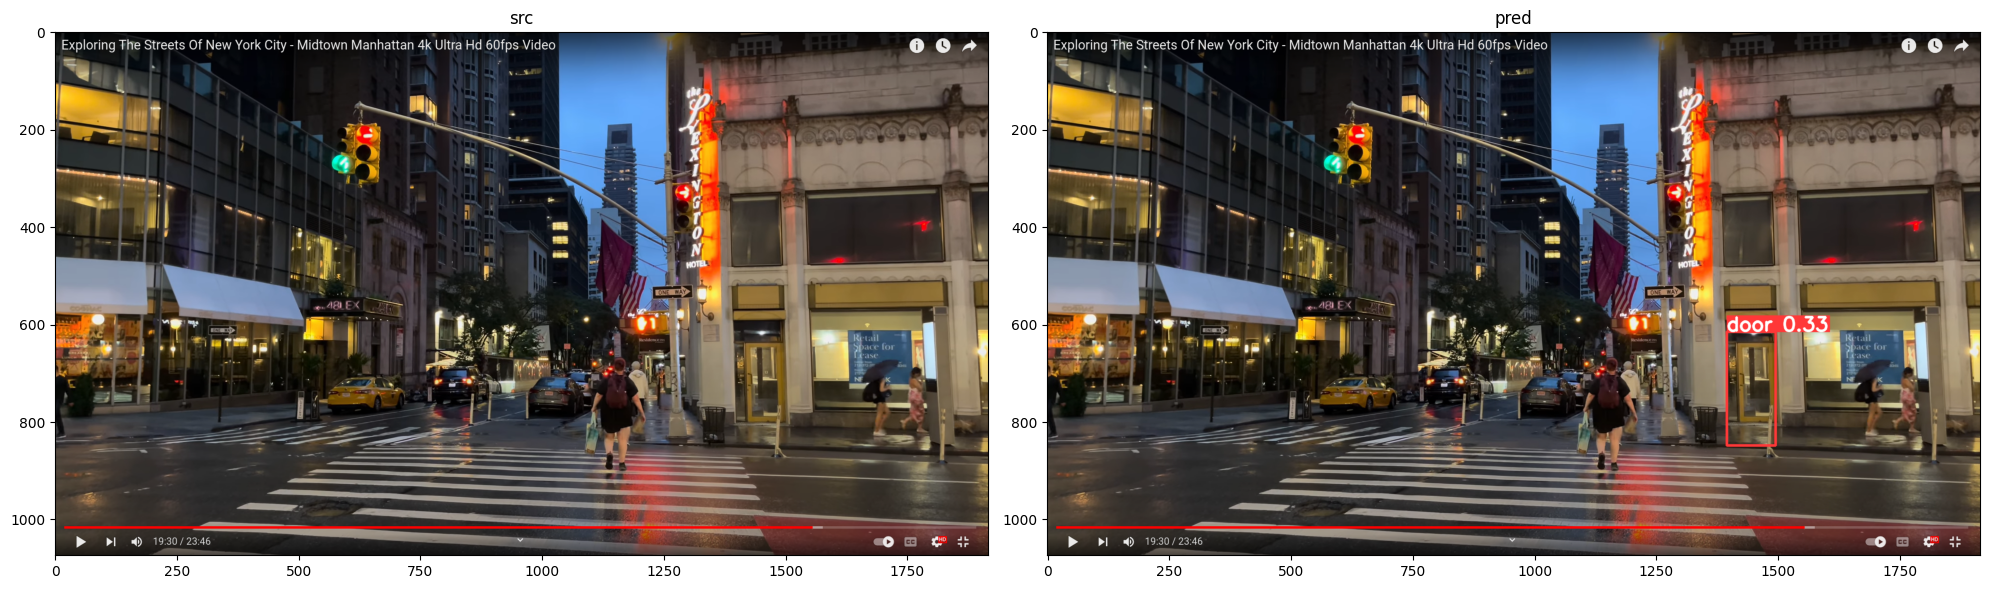

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load your images
image1 = mpimg.imread('/content/test.png')
image2 = mpimg.imread('/content/runs/detect/predict2/test.png')

# Plotting the images side by side
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.imshow(image1)
plt.title('src')

plt.subplot(1, 2, 2)
plt.imshow(image2)
plt.title('pred')

plt.tight_layout()
plt.show()


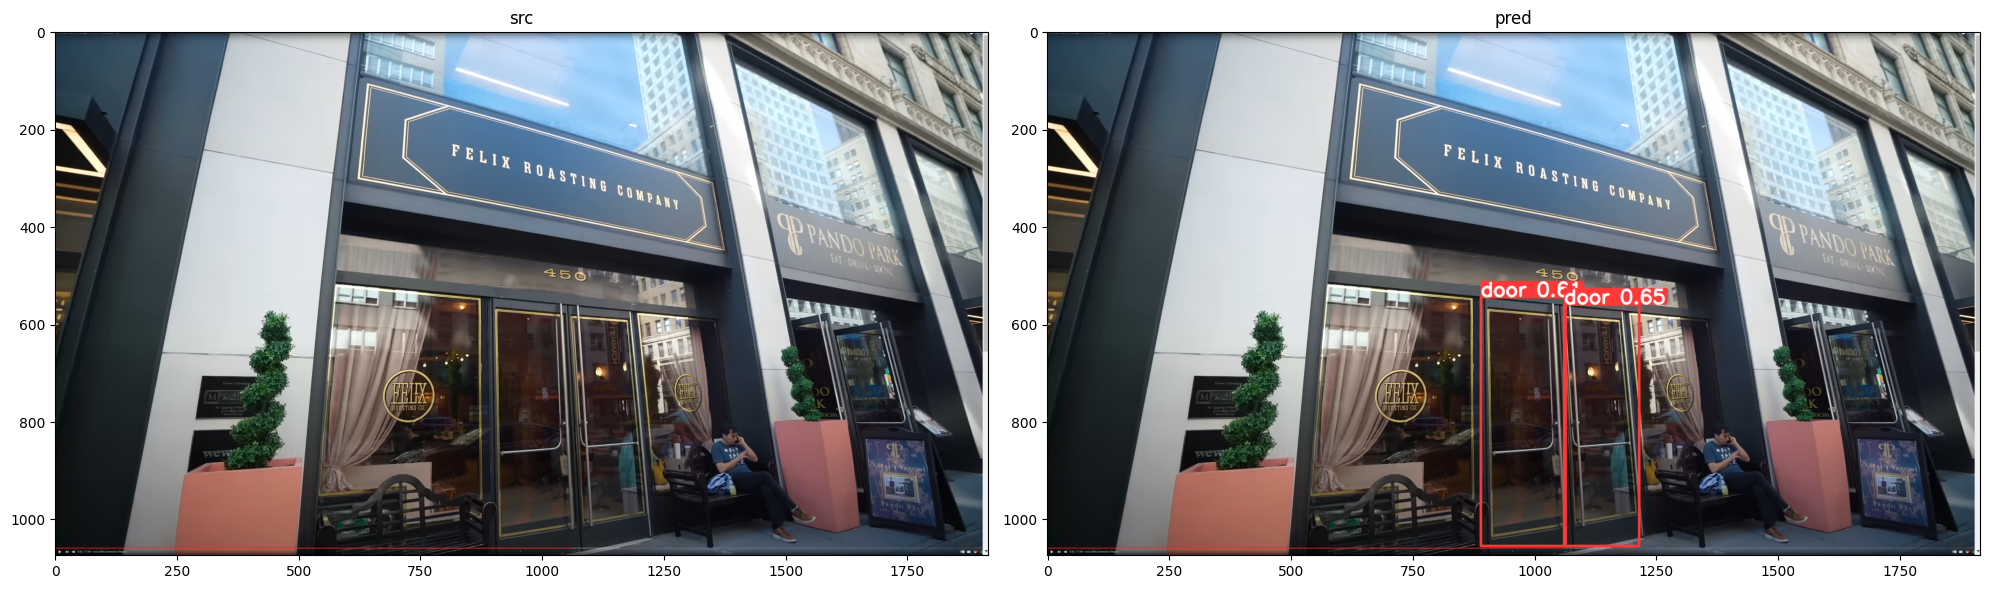

In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load your images
image1 = mpimg.imread('/content/Screenshot from 2023-08-27 00-34-20.png')
image2 = mpimg.imread('/content/runs/detect/predict3/Screenshot from 2023-08-27 00-34-20.png')

# Plotting the images side by side
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.imshow(image1)
plt.title('src')

plt.subplot(1, 2, 2)
plt.imshow(image2)
plt.title('pred')

plt.tight_layout()
plt.show()


In [ ]:
res=model.predict("https://www.youtube.com/watch?v=2pbnb72jlXA",save=True,conf=0.3)

# export

In [4]:
model.export(imgsz = 1280,format="onnx")

Ultralytics YOLOv8.0.163 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients

PyTorch: starting from '/content/best (4).pt' with input shape (1, 3, 1280, 1280) BCHW and output shape(s) (1, 5, 33600) (21.6 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 105.0 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 9.9s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.14.1 opset 17...
ONNX: export success ✅ 13.6s, saved as '/content/best (4).onnx' (43.1 MB)

Export complete (27.9s)
Results saved to /content
Predict:         yolo predict task=detect model=/content/best (4).onnx imgsz=1280 
Validate:        yolo val task=detect model=/content/best (4).onnx imgsz=1280 data=/content/data.yaml 
Visualize:       https

============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



'/content/best (4).onnx'